In [1]:
from tabulate import tabulate
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

import perceval as pcvl

In [2]:
states = [pcvl.BasicState("|0,{P:H}>"),
          pcvl.BasicState("|0,{P:V}>"),
          pcvl.BasicState("|{P:H},0>"),
          pcvl.BasicState("|{P:V},0>"),
         ]

states_modes = [
    pcvl.BasicState([0, 0, 0, 1]),
    pcvl.BasicState([0, 0, 1, 0]),
    pcvl.BasicState([0, 1, 0, 0]),
    pcvl.BasicState([1, 0, 0, 0])
]

In [3]:
BS = pcvl.BS.Ry()
pcvl.pdisplay(BS.U)

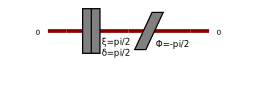

In [4]:
def HWP(xsi):
    hwp = pcvl.Circuit(m=1)
    hwp.add(0, pcvl.HWP(xsi)).add(0, pcvl.PS(-sp.pi/2))
    return hwp

pcvl.pdisplay(HWP(sp.pi/2))

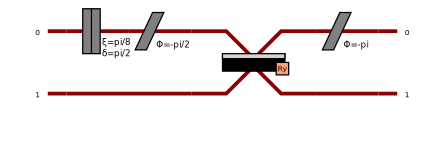

In [5]:
init_circuit = (pcvl.Circuit(m=2, name="Initialization")
                // HWP(sp.pi / 8)
                // BS
                // pcvl.PS(-sp.pi))

pcvl.pdisplay(init_circuit)

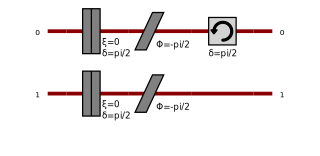

In [6]:
def oracle(mark):
    """Values 0, 1, 2 and 3 for parameter 'mark' respectively mark the elements "00", "01", "10" and "11" of the list."""
    oracle_circuit = pcvl.Circuit(m=2, name='Oracle')
    # The following dictionnary translates n into the corresponding component settings
    oracle_dict = {0: (1, 0), 1: (0, 1), 2: (1, 1), 3: (0, 0)}
    PC_state, LC_state = oracle_dict[mark]
    # Mode b
    if PC_state == 1:
        oracle_circuit //= HWP(0)
    oracle_circuit.add(0, pcvl.PR(sp.pi/2))
    if LC_state == 1:
        oracle_circuit //= HWP(0)
    # Mode a
    if LC_state == 1:
        oracle_circuit //= (1, HWP(0))
    if PC_state == 1:
        oracle_circuit //= (1, HWP(0))
    return oracle_circuit

pcvl.pdisplay(oracle(0))

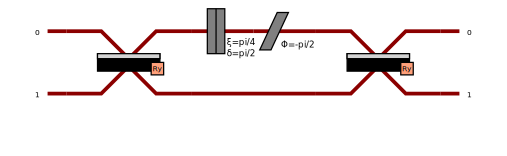

In [7]:
inversion_circuit = (pcvl.Circuit(m=2, name='Inversion')
                     // BS
                     // HWP(sp.pi / 4)
                     // BS)

pcvl.pdisplay(inversion_circuit)

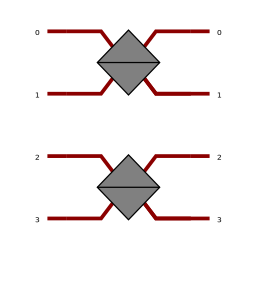

In [8]:
detection_circuit = pcvl.Circuit(m=4, name='Detection')
detection_circuit.add((0, 1), pcvl.PBS())
detection_circuit.add((2, 3), pcvl.PBS())

pcvl.pdisplay(detection_circuit)

Grover optical circuit for searching database element "00":


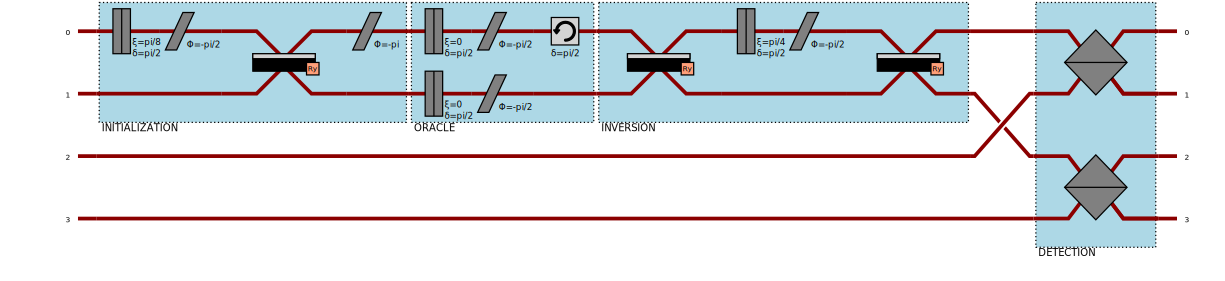

In [9]:
def grover_circuit(mark):
    grover_circuit = pcvl.Circuit(m=4, name='Grover')
    grover_circuit.add(0, init_circuit).add(0, oracle(mark)).add(0, inversion_circuit)
    grover_circuit.add(1, pcvl.PERM([1, 0])).add(0, detection_circuit)
    return grover_circuit

print('Grover optical circuit for searching database element "00":')
pcvl.pdisplay(grover_circuit(0), recursive=True)

In [16]:
# Circuit simulation
input_state = pcvl.BasicState("|{P:H},0, 0, 0>")
results_list = []  # probability amplitudes storage

mark = 2
sim = pcvl.Processor("Naive", grover_circuit(mark))
sim.with_input(input_state)
# ca = pcvl.algorithm.Analyzer(sim,
#                           input_states=[input_state],
#                           output_states=states_modes,
#                          )
# results_list.append(ca.distribution[0])


output_distribution=sim.probs()["results"]
pcvl.pdisplay(output_distribution, max_v=10)


state,probability
"|0,1,0,0>",1
